In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from utils import *
from setting import *
from model import *
from plotting import *

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
X, y = data_load()
X_train, X_test, y_train, y_test =\
        train_test_split(X, y, train_size=0.8, random_state=1)
X_train, X_test = z_score_normalization(X_train, X_test)

d:\anaconda\envs\py36-6201\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# k-Nearest Neighbors (KNN)
$ algorithm: auto $

$ metric: minkowski $

$ leaf size: 30 $

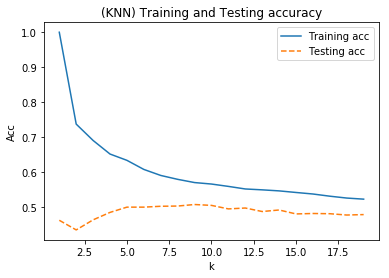

Best validation accuracy is 0.508125, parameter is 9


In [3]:
from sklearn.neighbors import KNeighborsClassifier
train_acc, val_acc = dict(), dict()
best_param, best_val = 1, -1
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_acc[k] = clf.score(X_train, y_train)
    val_acc[k] = clf.score(X_test, y_test)
    if val_acc[k] > best_val:
        best_val = val_acc[k]
        best_param = k
plot_gridsearch("KNN", train_acc, val_acc, 'k')
print ("Best validation accuracy is {}, parameter is {}".format(best_val, best_param))

## Best parameter result (k = 9) 

#### KNN model####
Testing Accuracy: 50.81%

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'):
               precision    recall  f1-score   support

   Electronic       0.42      0.56      0.48       185
 Experimental       0.51      0.26      0.35       185
         Folk       0.50      0.66      0.57       207
      Hip-Hop       0.51      0.61      0.56       222
 Instrumental       0.49      0.50      0.50       171
International       0.58      0.60      0.59       227
          Pop       0.35      0.30      0.32       188
         Rock       0.75      0.52      0.62       215

  avg / total       0.52      0.51      0.50      1600




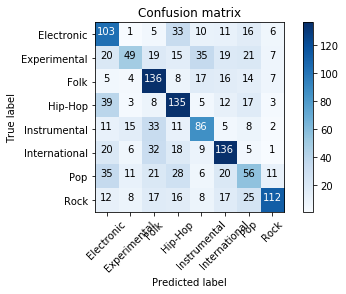

In [4]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
plot_report("KNN", clf, y_test, predicted)

## Cross Validation result (k = 9) 

In [5]:
scores = []
for train_idx, test_idx in cross_validation(X, y):
    cvX_train, cvX_test = X[train_idx], X[test_idx]
    cvy_train, cvy_test = y[train_idx], y[test_idx]
    cvX_train, cvX_test = z_score_normalization(cvX_train, cvX_test)
    clf = clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(cvX_train, cvy_train)
    predicted = clf.predict(cvX_test)
    scores.append(get_metrics(cvy_test, predicted))
scores = np.array(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores[:,0].mean(), scores[:,0].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores[:,1].mean(), scores[:,1].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores[:,2].mean(), scores[:,2].std() * 2))
print("F1-Measure: %0.2f (+/- %0.2f)" % (scores[:,3].mean(), scores[:,3].std() * 2))

Accuracy: 0.41 (+/- 0.05)
Recall: 0.41 (+/- 0.05)
Precision: 0.41 (+/- 0.04)
F1-Measure: 0.40 (+/- 0.05)


# Support Vector Machine (SVM)
$ kernel: rbf $

$ gamma: 0.001 $

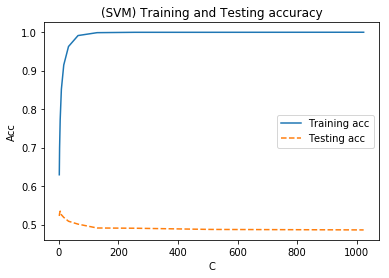

Best validation accuracy is 0.535, parameter is 4


In [6]:
from sklearn.svm import SVC
train_acc, val_acc = dict(), dict()
best_param, best_val = 1, -1
for C in range(0, 11):
    clf = SVC(kernel='rbf', C=2**C)
    clf.fit(X_train, y_train)
    train_acc[2**C] = clf.score(X_train, y_train)
    val_acc[2**C] = clf.score(X_test, y_test)
    if val_acc[2**C] > best_val:
        best_val = val_acc[2**C]
        best_param = 2**C
plot_gridsearch("SVM", train_acc, val_acc, 'C')
print ("Best validation accuracy is {}, parameter is {}".format(best_val, best_param))

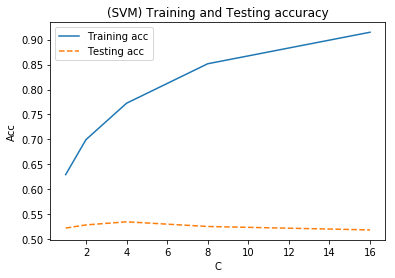

Best validation accuracy is 0.535, parameter is 4


In [7]:
from sklearn.svm import SVC
train_acc, val_acc = dict(), dict()
best_param, best_val = 1, -1
for C in range(0, 5):
    clf = SVC(kernel='rbf', C=2**C)
    clf.fit(X_train, y_train)
    train_acc[2**C] = clf.score(X_train, y_train)
    val_acc[2**C] = clf.score(X_test, y_test)
    if val_acc[2**C] > best_val:
        best_val = val_acc[2**C]
        best_param = 2**C
plot_gridsearch("SVM", train_acc, val_acc, 'C')
print ("Best validation accuracy is {}, parameter is {}".format(best_val, best_param))

$ kernel: poly $

$ gamma: 0.001 $

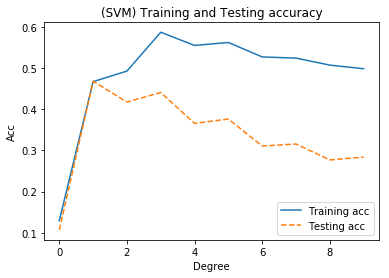

Best validation accuracy is 0.468125, parameter is 1


In [8]:
from sklearn.svm import SVC
train_acc, val_acc = dict(), dict()
best_param, best_val = 1, -1
import datetime
for d in range(0, 10):
    clf = SVC(kernel='poly', degree=d)
    clf.fit(X_train, y_train)
    train_acc[d] = clf.score(X_train, y_train)
    val_acc[d] = clf.score(X_test, y_test)
    if val_acc[d] > best_val:
        best_val = val_acc[d]
        best_param = d
plot_gridsearch("SVM", train_acc, val_acc, 'Degree')
print ("Best validation accuracy is {}, parameter is {}".format(best_val, best_param))

## Best parameter result (rbf, C = 4) 

#### SVM model####
Testing Accuracy: 53.50%

Classification report for classifier SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
               precision    recall  f1-score   support

   Electronic       0.45      0.56      0.50       185
 Experimental       0.43      0.44      0.44       185
         Folk       0.55      0.58      0.57       207
      Hip-Hop       0.53      0.57      0.55       222
 Instrumental       0.51      0.49      0.50       171
International       0.70      0.57      0.63       227
          Pop       0.36      0.32      0.34       188
         Rock       0.74      0.69      0.71       215

  avg / total       0.54      0.54      0.54      1600




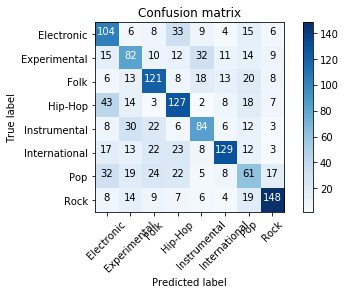

In [9]:
clf = SVC(C=4)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
plot_report("SVM", clf, y_test, predicted)

## Cross Validation result (rbf, C = 4) 

In [10]:
scores = []
for train_idx, test_idx in cross_validation(X, y):
    cvX_train, cvX_test = X[train_idx], X[test_idx]
    cvy_train, cvy_test = y[train_idx], y[test_idx]
    cvX_train, cvX_test = z_score_normalization(cvX_train, cvX_test)
    clf = SVC(C=4)
    clf.fit(cvX_train, cvy_train)
    predicted = clf.predict(cvX_test)
    scores.append(get_metrics(cvy_test, predicted))
scores = np.array(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores[:,0].mean(), scores[:,0].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores[:,1].mean(), scores[:,1].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores[:,2].mean(), scores[:,2].std() * 2))
print("F1-Measure: %0.2f (+/- %0.2f)" % (scores[:,3].mean(), scores[:,3].std() * 2))

Accuracy: 0.46 (+/- 0.06)
Recall: 0.46 (+/- 0.06)
Precision: 0.46 (+/- 0.06)
F1-Measure: 0.46 (+/- 0.06)


# Mutilayer Perceptron

In [11]:
from sklearn import metrics
classes = np.unique(np.array(genres))
num_classes = classes.shape[0]
y_1h = one_hot_encoder(y)
X_train, X_test, y_train_1h, y_test_1h =\
        train_test_split(X, y_1h, train_size=0.8, random_state=1)
model = MLP(X, num_classes, keep_prob=0.5)
X_train, X_test = z_score_normalization(X_train, X_test)
history = model.fit(X_train, y_train_1h, validation_data=(X_test, y_test_1h),\
                 epochs=100, batch_size=32, verbose=0)
predict = model.predict(X_test)
predict_ = []
for p in predict:
    curr = (p == max(p))
    idx = np.where(curr)[0][0]
    predict_.append(classes[idx])
cm = metrics.confusion_matrix(y_test, predict_)
print("Testing Accuracy: {:.2%}\n".format(metrics.accuracy_score(y_test, predict_)))

d:\anaconda\envs\py36-6201\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                702       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                702       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 216       
Total params: 1,620
Trainable params: 1,620
Non-trainable params: 0
_________________________________________________________________
Testing Accuracy: 45.69%



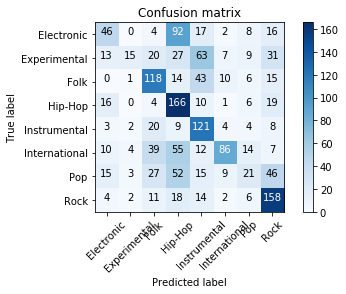

In [12]:
plot_confusion_matrix(cm, classes)

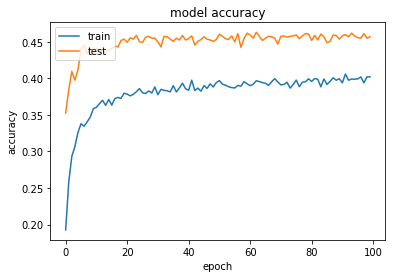

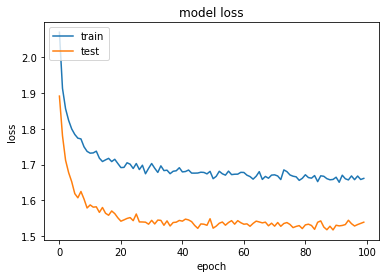

In [13]:
plot_keras_history(history)

## Cross Validation result

In [14]:
scores = []
for train_idx, test_idx in cross_validation(X, y):
    cvX_train, cvX_test = X[train_idx], X[test_idx]
    cvy_train, cvy_test = y[train_idx], y[test_idx]
    cvX_train, cvX_test = z_score_normalization(cvX_train, cvX_test)
    model = MLP(X, num_classes, keep_prob=0.5, summary=False)
    cvy_train_1h = one_hot_encoder(cvy_train)
    cvy_test_1h = one_hot_encoder(cvy_test)
    history = model.fit(cvX_train, cvy_train_1h, validation_data=(cvX_test, cvy_test_1h),\
                 epochs=100, batch_size=32, verbose=0)
    predict = model.predict(cvX_test)
    predict_ = []
    for p in predict:
        curr = (p == max(p))
        idx = np.where(curr)[0][0]
        predict_.append(classes[idx])
    scores.append(get_metrics(cvy_test, predict_))
scores = np.array(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores[:,0].mean(), scores[:,0].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scores[:,1].mean(), scores[:,1].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores[:,2].mean(), scores[:,2].std() * 2))
print("F1-Measure: %0.2f (+/- %0.2f)" % (scores[:,3].mean(), scores[:,3].std() * 2))

Accuracy: 0.42 (+/- 0.05)
Recall: 0.42 (+/- 0.05)
Precision: 0.43 (+/- 0.07)
F1-Measure: 0.37 (+/- 0.05)
